I read the article to learn and use the code here.
https://machinelearningmastery.com/multi-class-imbalanced-classification/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import imblearn

In [2]:
X_train = pd.read_csv("train_x.csv")
y_train = pd.read_csv("train_labels.csv")
X_test = pd.read_csv("test_x.csv")
y_test = pd.read_csv("test_labels.csv")

In [3]:
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

Class=0, n=378 (25.000%)
Class=1, n=378 (25.000%)
Class=2, n=378 (25.000%)
Class=3, n=378 (25.000%)


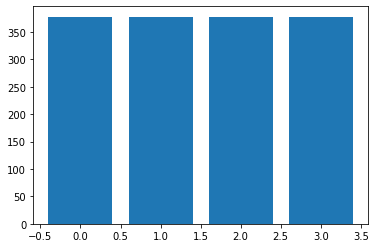

In [4]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot


# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X_train, y_train)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [17]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier()

model.fit(X,y)

param_grid = {
                'n_estimators': [5, 10, 20, 30, 40, 50],
                'max_depth': [2, 7, 12, 17],
                'criterion': ["entropy"],
                'random_state': [0],
             }

grid_clf1 = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
grid_clf1.fit(X,y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [2, 7, 12, 17],
                         'n_estimators': [5, 10, 20, 30, 40, 50],
                         'random_state': [0]})

In [18]:
grid_clf1.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=12, n_estimators=20,
                       random_state=0)

In [19]:
from sklearn.metrics import confusion_matrix,accuracy_score

pred=grid_clf1.best_estimator_.predict(X_test)
cm=confusion_matrix(y_test,pred)
AS=accuracy_score(y_test,pred)

print(cm)
print(AS)

[[157   0   1   4]
 [  0   4   3   0]
 [  1   4   1   0]
 [  2   1   1   5]]
0.907608695652174
